In [1]:
from UCLSE.dyna_q.Experiment1a import Experiment
import numpy as np
import pandas as pd
import visdom

In [2]:
vis=visdom.Visdom(port=8097)

In [3]:
trader_pref_kwargs={'qty_min':-5,'qty_max':5,'sigma_pv':1}
timer_kwargs={'start':0,'end':5000,'step':1}
price_sequence_kwargs={'kappa':0.0002,'mean':100,'sigma':1,'block_length':10}
noise_kwargs={'sigma':1}
messenger_kwargs={'logging':True}
env_kwargs={'trader_arrival_rate':1,'recording':True,#'process_verbose':False,
                'bookkeep_verbose':False, 'lob_verbose':False}
sigma_n=5

def cont_coef():
    return np.random.uniform(0.2,0.8)

def personal_memory():
    return int(np.random.uniform(5,10))

trader_kwargs={'ZIP':{'prefix':'ZIP','number':10,'object_name':'WW_Zip',
                          'setup_kwargs':
                                {'market_make':True,'prior':(100,sigma_n)}},
               'HBL':{'prefix':'HBL','number':10,'object_name':'HBL',
                          'setup_kwargs':
                              {'memory':100,'grace_period':20}},
               'CON':{'prefix':'CON','number':10,'object_name':'ContTrader',
                      'setup_kwargs':
                          {'cont_coeff':cont_coef,'personal_memory':personal_memory,'profit_target':4, 'market_make':True,
                          'prior':(100,sigma_n)}},
               'NOI':{'prefix':'NOI','number':10,'object_name':'NoiseTrader',
                          'setup_kwargs':{'memory':20}}
              }

lobenv_kwargs={'cutoff':100,'profit_target':10,'loss_limit':-2}

In [4]:
dyna_config={
	"double_q_model": False,
	"batch_size": 128,
	"learning_rate": 5e-3,
	"exploration": {
		"type": "exponential",
		"init_epsilon": 0.8,
		"min_epsilon": 0.05,
		"decay_steps": 100000,
		"decay_eps": 0.99,
        "choice":'least_bonus'
	},
	"memory": {
		"memory_capacity": 1000000,
		"prioritized": False,
        "tabular memory":True,
        
	},
	"discount": 0.99,
	"target_update_freq": 100,
	"first_update": 200,
	"modify_reward": False,
    "learn":'Q',
    'double_q_model':True
    #"clipping":1
    
}

In [5]:
agent_kwargs={'CVAE':True,'latent_dim':2,'recon_weight':0.1,'kl_thresh':0.01,
                   'env_H1Size':32,'env_H2Size':16,'Q_H1Size':32,'Q_H2Size':16,
                   'doneModel':None,'rewardModel':None,'loss_func':None}

sequence made
adding exchange to RL trader  RL
adding exchange to RL trader  RL
                               tid      
otype                          Ask   Bid
price time qid oid       qty            
89    11   7   ZIP7_11_0 1     NaN  ZIP7
92    18   15  ZIP1_18_2 1     NaN  ZIP1
94    12   9   ZIP9_12_0 1     NaN  ZIP9
96    6    5   ZIP8_6_0  1     NaN  ZIP8
97    3    3   ZIP4_3_0  1     NaN  ZIP4
99    24   22  ZIP3_24_0 1     NaN  ZIP3
100   22   20  CON7_22_1 1     NaN  CON7
102   13   11  CON2_13_1 1     NaN  CON2
      17   13  CON9_17_1 1     NaN  CON9
      19   17  CON1_19_1 1     NaN  CON1
104   21   19  HBL8_21_0 1    HBL8   NaN
      22   21  CON7_22_0 1    CON7   NaN
106   12   10  ZIP9_12_1 1    ZIP9   NaN
      13   12  CON2_13_0 1    CON2   NaN
      17   14  CON9_17_0 1    CON9   NaN
      19   18  CON1_19_0 1    CON1   NaN
107   2    2   HBL2_2_0  1    HBL2   NaN
      11   8   ZIP7_11_1 1    ZIP7   NaN
      18   16  ZIP1_18_3 1    ZIP1   NaN
      25   25  HBL

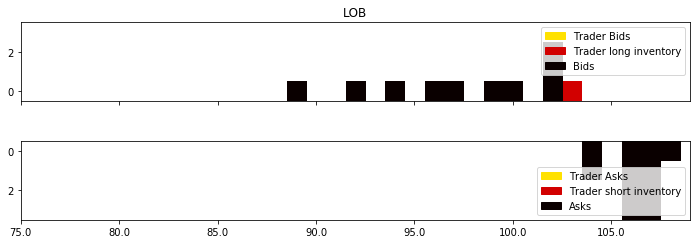

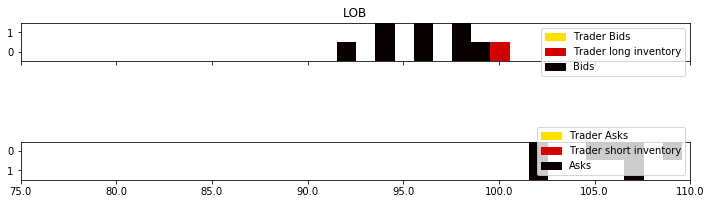

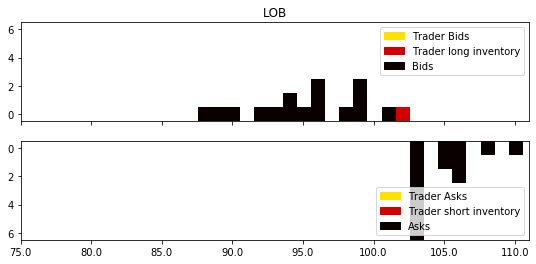

In [9]:
experiment=Experiment(trader_pref_kwargs,timer_kwargs,
           price_sequence_kwargs,noise_kwargs,
           messenger_kwargs,env_kwargs,trader_kwargs,
           lobenv_kwargs,dyna_config,agent_kwargs,visdom=vis)

In [12]:
experiment.new_train_setup(MaxEpisodes=1001,planning_steps=1,lookback=50,thresh=5,planning=True,graph=True)

In [15]:
experiment.train(MaxEpisodes=experiment.MaxEpisodes,start_episode=experiment.episode)

Planning is True, double Q model is True, tabular memory is True
Dyna-Q - EXP: 1 | Ep: 101 | timestep: 47 | Ep_r:  -0.9239999999999999 Profit: -4 Avg loss:-1.63868
Dyna-Q - EXP: 1 | Ep: 121 | timestep: 25 | Ep_r:  1.9880000000000002 Profit: 2 Avg loss:-1.16344
sequence made
adding exchange to RL trader  RL
adding exchange to RL trader  RL
Dyna-Q - EXP: 1 | Ep: 141 | timestep: 46 | Ep_r:  -2.92 Profit: -2 Avg loss:-0.7368799999999999
sequence made
adding exchange to RL trader  RL
adding exchange to RL trader  RL
sequence made
adding exchange to RL trader  RL
adding exchange to RL trader  RL
Dyna-Q - EXP: 1 | Ep: 161 | timestep: 46 | Ep_r:  0.030000000000000027 Profit: -1 Avg loss:-1.22704
Dyna-Q - EXP: 1 | Ep: 181 | timestep: 28 | Ep_r:  -1.996 Profit: -2 Avg loss:-1.1682
copying eval net to target net
Dyna-Q - EXP: 1 | Ep: 201 | timestep: 100 | Ep_r:  -2.7039999999999997 Profit: 0 Avg loss:-1.06436
sequence made
adding exchange to RL trader  RL
adding exchange to RL trader  RL
Dyna-Q -

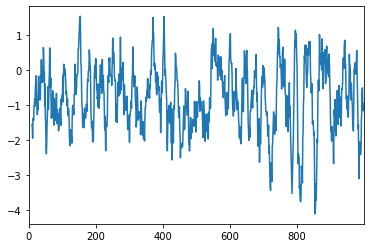

In [11]:
rl=pd.DataFrame(np.array(experiment.rwd_dyna))#.rolling(10).mean().plot()
rl.columns=['reward','time']
#rl=rl.set_index('time')
rl.rolling(10).reward.mean().plot()

sequence made
adding exchange to RL trader  RL
adding exchange to RL trader  RL
                               tid      
otype                          Ask   Bid
price time qid oid       qty            
89    5    1   ZIP2_5_0  1     NaN  ZIP2
90    31   21  HBL5_31_1 1     NaN  HBL5
93    19   14  HBL3_19_1 1     NaN  HBL3
      25   18  ZIP3_25_0 1     NaN  ZIP3
94    8    4   ZIP0_8_0  1     NaN  ZIP0
96    11   7   ZIP7_11_0 1     NaN  ZIP7
      26   20  HBL4_26_0 1     NaN  HBL4
      32   22  ZIP8_32_2 1     NaN  ZIP8
      36   24  CON8_36_0 1     NaN  CON8
      37   26  CON7_37_0 1     NaN  CON7
      39   29  CON4_39_0 1     NaN  CON4
99    42   32  HBL1_42_0 1     NaN  HBL1
100   37   27  CON7_37_1 1    CON7   NaN
      39   30  CON4_39_1 1    CON4   NaN
102   8    5   ZIP0_8_1  1    ZIP0   NaN
103   11   8   ZIP7_11_1 1    ZIP7   NaN
104   25   19  ZIP3_25_1 1    ZIP3   NaN
105   15   11  HBL2_15_0 1    HBL2   NaN
      24   17  HBL8_24_0 1    HBL8   NaN
107   32   23  ZIP

adding exchange to RL trader  RL
adding exchange to RL trader  RL
sequence made
adding exchange to RL trader  RL
adding exchange to RL trader  RL
Dyna-Q - EXP 1, | Ep: , 171, | timestep:  20 | Ep_r: 1.8800000000000001|profit:0 start:30|end:50
sequence made
adding exchange to RL trader  RL
adding exchange to RL trader  RL
sequence made
adding exchange to RL trader  RL
adding exchange to RL trader  RL
sequence made
adding exchange to RL trader  RL
adding exchange to RL trader  RL
sequence made
adding exchange to RL trader  RL
adding exchange to RL trader  RL
sequence made
adding exchange to RL trader  RL
adding exchange to RL trader  RL
sequence made
adding exchange to RL trader  RL
adding exchange to RL trader  RL
sequence made
adding exchange to RL trader  RL
adding exchange to RL trader  RL
sequence made
adding exchange to RL trader  RL
adding exchange to RL trader  RL
sequence made
adding exchange to RL trader  RL
adding exchange to RL trader  RL
sequence made
adding exchange to RL t

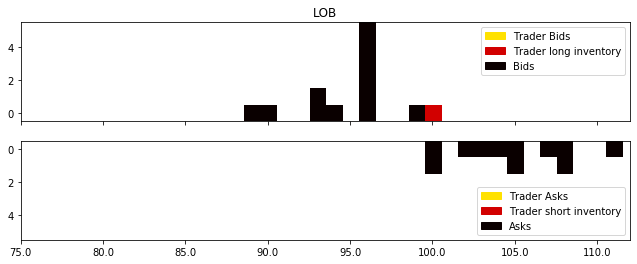

In [12]:
experiment.test_setup(MaxEpisodes=250)

In [13]:
experiment.lobenv_test.trader.balance

0

In [14]:
experiment.rwd_test

[(26, 35, 9, 0, 3.624, 0),
 (26, 59, 42, 1, -1.8719999999999999, 0),
 (66, 100, 76, 2, 0.8320000000000003, 0),
 (59, 79, 96, 3, -5.1240000000000006, 0),
 (44, 89, 141, 4, 0.17600000000000016, 0),
 (26, 34, 149, 5, -0.07199999999999984, 0),
 (26, 45, 168, 6, -7.828, 0),
 (35, 67, 200, 7, -0.8799999999999999, 0),
 (28, 65, 237, 8, -0.006000000000000005, 0),
 (22, 39, 254, 9, -0.1359999999999999, 0),
 (79, 82, 257, 10, -6.042, 0),
 (35, 54, 276, 11, -0.07799999999999985, 0),
 (25, 38, 289, 12, 2.7520000000000002, 0),
 (46, 64, 307, 13, -0.08199999999999985, 0),
 (43, 66, 330, 14, -0.06199999999999983, 0),
 (29, 41, 342, 15, -0.10599999999999987, 0),
 (34, 47, 355, 16, 3.652, 0),
 (38, 54, 371, 17, 3.664, 0),
 (39, 59, 391, 18, -2.1239999999999997, 0),
 (106, 110, 395, 19, -3.088, 0),
 (91, 109, 413, 20, -3.932, 0),
 (36, 53, 430, 21, -0.1359999999999999, 0),
 (40, 64, 454, 22, -1.008, 0),
 (51, 71, 474, 23, 0.07600000000000029, 0),
 (33, 56, 497, 24, -2.0620000000000003, 0),
 (31, 68, 534

In [15]:
experiment.lobenv_test.trader.blotter

{'RL_40_1': [{'tid': 'RL',
   'otype': 'Bid',
   'client_price': 100,
   'order_qty': 1,
   'order_issue_time': 40,
   'accession_time': 40,
   'qid': 45.0,
   'oid': 'RL_40_1',
   'exec_time': 40,
   'exec_qty': 1,
   'exec_price': 100,
   'profit': 0,
   'improvement': 0,
   'BS': 'Buy',
   'status': 'complete'}]}